In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive

drive.mount('/content/drive')

%pwd
%cd "/content/drive/MyDrive/Colab Notebooks/Taller 1"
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Taller 1


'/content/drive/MyDrive/Colab Notebooks/Taller 1'

In [5]:
data=np.loadtxt("datos3.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
print(data[:,2])
dataSize = data.shape
print(dataSize[0])

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
100


In [6]:
#normalizar
promX = np.mean(data, 0)
print(promX)
dstdX = np.std(data, axis=0)
print(dstdX)
m = dataSize[0]
print(m)

[65.64427406 66.22199809  0.6       ]
[19.36068671 18.48963567  0.48989795]
100


In [7]:
def normalizando(data,promX,dstdX,m):
  Xn = np.zeros((m,3))

  for i in range(m):
    for j in range(2):
        Xn[i,j] = (data[i,j]-promX[j])/dstdX[j]
        Xn[i,2] = data[i,2]
  print(Xn)
  return(Xn)

In [ ]:
Xn = np.zeros((m,3))
Xn = normalizando(data,promX,dstdX,m)

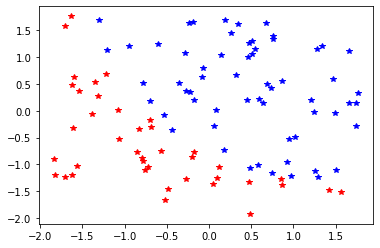

In [9]:
index0 = np.where(data[:,2] == 0)
datosX1Y0 = Xn[index0,0]
datosX2Y0 = Xn[index0,1]

plt.plot(datosX1Y0,datosX2Y0,'r*')

index0 = np.where(data[:,2] == 1)
datosX1Y1 = Xn[index0,0]
datosX2Y1 = Xn[index0,1]

plt.plot(datosX1Y1,datosX2Y1,'b*')

plt.show()

In [10]:
Beta = np.zeros((3,1))
onesVector = np.ones((dataSize[0],))

X = np.column_stack((onesVector,Xn[:,0],Xn[:,1]))
y=np.zeros((dataSize[0],1))
y[:,0] = Xn[:,2]

alpha = 0.01
numIter = 500

In [11]:
temp1 = (np.reshape(X[:,0],(m,1)))
h_beta = np.dot(X,Beta)
temp3 = np. multiply(temp1,(np.subtract(h_beta,y)))
temp2 = np.sum(temp3)
temp4=temp2*(alpha/m)

In [12]:
def Gradiente(Beta,alpha,m,X,y,numIter):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))
  Z = np.zeros((m,1))
  

  for i in range(numIter):
    for j in range(3):
      Z = np.dot(X,Beta)
      h_beta =  1/(1+(1/np.exp(Z)))
      temp1 = (np.reshape(X[:,j],(m,1)))
      temp2 = np.sum(np. multiply(temp1,(np.subtract(h_beta,y))))
      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m)) + ((1/m)*Beta[j,0])
  
    Beta = betaTemp
    #Z = np.dot(X,Beta)
    #J[i]  = (1/(2*m))*(np.sum((np.subtract(h_beta,y)**2))) Implementar la función cost


  return (Beta)


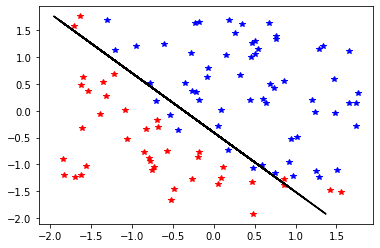

In [13]:
alpha = 0.01
numIter = 5500
#J = np.zeros(numIter,)
Beta = np.zeros((3,1))
rectaX1c = np.zeros((m,1))

Beta = Gradiente(Beta,alpha,m,X,y,numIter)

for k in range(m):
  rectaX1c[k,0] = (-Beta[0,0] -Beta[2,0]*Xn[k,1])/Beta[1,0]

index0 = np.where(data[:,2] == 0)
datosX1Y0 = Xn[index0,0]
datosX2Y0 = Xn[index0,1]

plt.plot(datosX1Y0,datosX2Y0,'r*')

index0 = np.where(data[:,2] == 1)
datosX1Y1 = Xn[index0,0]
datosX2Y1 = Xn[index0,1]

plt.plot(datosX1Y1,datosX2Y1,'b*')

plt.plot(rectaX1c, Xn[:,1], 'black')

plt.show()

In [14]:
Metricas = np.zeros((4,1))

for i in range(m):
  L = (Beta[0,0] + Beta[1,0]*Xn[i,0] + Beta[2,0]*Xn[i,1])
  if (L >= 0):
    L = 1
    if (L == Xn[i,2]): #L vs Y
      Metricas[0,0] = Metricas[0,0] + 1 #1-1 verdadero positivo
    else:
      Metricas[3,0] = Metricas[3,0] + 1 #1-0 falso negativo
  else:
    L = 0
    if (L == Xn[i,2]): #L vs Y
      Metricas[1,0] = Metricas[1,0] + 1 #0-0 verdadero negativo
    else:
      Metricas[2,0] = Metricas[2,0] + 1 #0-1 falso positivo

In [16]:
P = Metricas[0,0] / (Metricas[0,0] + Metricas[2,0]) #Precision

R = Metricas[0,0] / (Metricas[0,0] + Metricas[3,0]) #Recall

FPR = Metricas[2,0] / (Metricas[1,0] + Metricas[2,0]) #Tasa FP

Err = (Metricas[2,0] + Metricas[3,0]) / (Metricas[0,0]+Metricas[1,0]+Metricas[2,0]+Metricas[3,0]) #Error

Acc = (1 - Err) #Accuracy

Ac = (Metricas[0,0] + Metricas[1,0]) / (Metricas[0,0]+Metricas[1,0]+Metricas[2,0]+Metricas[3,0]) #Accuracy